 <h1><center>Predicting the Age of Abalone using K-Nearest Neighbors</center></h1>
<h2><center>A machine learning project</center></h2>
<h3><center>by Jacqueline Tiefert</center></h3>


### Adding 1.5 to the number of rings on an abalone shell gives its age in years. This project seeks to find the features and the best hyperparameter k (number of folds) which most accurately predict the age of abalone, as measured by minimizing the root mean squared error between the actual number of rings and the predicted number of rings. This dataset is available on Kaggle and the University of California, Irvine Machine Learning Repository. The link to the original data file is [here](https://archive.ics.uci.edu/ml/datasets/abalone). The length, diameter, and height are measured in mm. The weight columns are measured in grams.

In [7]:
import pandas as pd
import numpy as np
abalone = pd.read_csv("abalone.csv")
abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### I explore the dataset to check for any null values. The shape of the dataset shows that it has 4,177 rows each representing a unique abalone.

In [8]:
abalone.shape


(4177, 9)

In [9]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### There are no null values, so I am ready to begin. The code below randomly shuffles the dataset and selects a training set which is 75% of the rows, and the remaning 25% is set aside as the test set. Below that, I have taken a closer look at the 'Rings' column which is used to predict the ages in years. The max number of rings is 29 (or 30.5 years) and the min. number of rings is 1 (or 2.5 years old). The average number of rings is 9.9 (11.4 years old) and most of the rings are spread between 8 and 11 rings (9.5 years to 12.5 years old abalone). 

In [10]:
# Splitting the dataset into training data and test data. 
# Training data is 75% of the rows, and the test data is the remaining 25%

abalone_new['Rings'].astype(float)
abalone_train = abalone_new[0:3132]
abalone_test = abalone_new[3132:]
abalone_new['Rings'].describe()


count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

## Univariate Model

### Here I test each feature individually to see which is best at predicting the age of the abalone.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    abalone_new = abalone.copy()    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(abalone_new.index)
    rand_abalone = abalone_new.reindex(shuffled_index)
    
    # Select the first 75% of rows and set as training set.
    # Select the last 25% and set as test set.
    train_abalone = rand_abalone.iloc[0:3132]
    test_abalone = rand_abalone.iloc[3132:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_abalone[[train_col]], train_abalone[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_abalone[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_abalone[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse



print("RMSE of 'Length':", knn_train_test('Length','Rings', abalone))
print("RMSE of 'Diameter':", knn_train_test('Diameter','Rings', abalone))
print("RMSE of 'Height':", knn_train_test('Height','Rings', abalone))
print("RMSE of 'Whole weight':", knn_train_test('Whole weight','Rings', abalone))
print("RMSE of 'Shucked weight':", knn_train_test('Shucked weight','Rings', abalone))
print("RMSE of 'Viscera weight':", knn_train_test('Viscera weight','Rings', abalone))
print("RMSE of 'Shell weight':", knn_train_test('Shell weight','Rings', abalone))



RMSE of 'Length': 3.1153455651710007
RMSE of 'Diameter': 2.8890289092145673
RMSE of 'Height': 2.7378823933836163
RMSE of 'Whole weight': 2.911807344171207
RMSE of 'Shucked weight': 3.078637615793387
RMSE of 'Viscera weight': 2.8558208835044763
RMSE of 'Shell weight': 2.5934699004233526


### The features with the lowest root mean square of error are 'Shell weight', 'Height', 'Viscera weight', and 'Diameter' in that order. The root mean square error for Shell weight, for example, means that the age value is off by 2.59 years on average for the predicted age. Now I will try a multivariate model, using these most useful features for predicting the age of the abalone.

## Multivariate Model

In [12]:
# two feature model
def knn_train_test(train_col_1, train_col_2, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    abalone_new = abalone.copy()    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(abalone_new.index)
    rand_abalone = abalone_new.reindex(shuffled_index)
    
    # Select the first 75% of the rows and set as training set.
    # Select the last 25% and set as test set.
    train_abalone = rand_abalone.iloc[0:3132]
    test_abalone = rand_abalone.iloc[3132:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_abalone[[train_col_1, train_col_2]], train_abalone[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_abalone[[train_col_1, train_col_2]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_abalone[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

## Try all combinations of just two features and look for lowest root mean squared error
print("RMSE of 'Shell weight' and 'Height':", knn_train_test('Shell weight','Height','Rings', abalone))
print("RMSE of 'Shell weight' and 'Viscera weight':", knn_train_test('Shell weight', 'Viscera weight','Rings', abalone))
print("RMSE of 'Shell weight' and 'Diameter':", knn_train_test('Shell weight','Diameter','Rings', abalone))

print("RMSE of 'Height' and 'Viscera weight':", knn_train_test('Height','Viscera weight','Rings', abalone))
print("RMSE of 'Height' and 'Diameter':", knn_train_test('Height','Diameter','Rings', abalone))

print("RMSE of 'Viscera weight' and 'Diameter':", knn_train_test('Viscera weight','Diameter','Rings', abalone))



RMSE of 'Shell weight' and 'Height': 2.6617258853975208
RMSE of 'Shell weight' and 'Viscera weight': 2.658099475747006
RMSE of 'Shell weight' and 'Diameter': 2.4966733848124028
RMSE of 'Height' and 'Viscera weight': 2.764297327155431
RMSE of 'Height' and 'Diameter': 2.7920598285359866
RMSE of 'Viscera weight' and 'Diameter': 2.888850038588806


### The best combination of two features for predicting age of abalone is shell weight and diameter. Now I will test these two in combination with a third to find the best three features. Note that it is better than just using shell weight to predict age (lower RMSE)

In [13]:
# three feature model
def knn_train_test(train_col_1, train_col_2, train_col_3, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    abalone_new = abalone.copy()    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(abalone_new.index)
    rand_abalone = abalone_new.reindex(shuffled_index)
    
    # Select the first 75% of rows and set as training set.
    # Select the last 25% and set as test set.
    train_abalone = rand_abalone.iloc[0:3132]
    test_abalone = rand_abalone.iloc[3132:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_abalone[[train_col_1, train_col_2, train_col_3]], train_abalone[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_abalone[[train_col_1, train_col_2, train_col_3]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_abalone[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

print("RMSE of 'Shell weight', 'Diameter', and 'Height':", knn_train_test('Shell weight','Diameter','Height','Rings', abalone))
print("RMSE of 'Shell weight', 'Diameter', and 'Viscera weight':", knn_train_test('Shell weight','Diameter', 'Viscera weight','Rings', abalone))



RMSE of 'Shell weight', 'Diameter', and 'Height': 2.5050456260349323
RMSE of 'Shell weight', 'Diameter', and 'Viscera weight': 2.482150634094339


### Even better than using shell weight and diameter, is combining shell weight, diamater, and viscera weight to predict the age. Now I will use all four of the best features in combination and see whether the RMSE can be minimized further.

In [14]:
# four feature model
def knn_train_test(train_col_1, train_col_2, train_col_3, train_col_4, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    abalone_new = abalone.copy()    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(abalone_new.index)
    rand_abalone = abalone_new.reindex(shuffled_index)
    
    # Select the first 75% of rows and set as training set.
    # Select the remaining 25% and set as test set.
    train_abalone = rand_abalone.iloc[0:3132]
    test_abalone = rand_abalone.iloc[3132:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_abalone[[train_col_1, train_col_2, train_col_3, train_col_4]], train_abalone[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_abalone[[train_col_1, train_col_2, train_col_3, train_col_4]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_abalone[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

print("RMSE of 'Shell weight', 'Diameter', 'Viscera weight', and 'Height':", knn_train_test('Shell weight','Diameter', 'Viscera weight', 'Height','Rings', abalone))

RMSE of 'Shell weight', 'Diameter', 'Viscera weight', and 'Height': 2.493912204975228


### As we can see, adding the fourth feature increases the RMSE from 2.48 to 2.49, so the best combination of features to predict age is just three: shell weight, diameter, and viscera weight.

## Hyperparameter Optimization


### Here I am taking the best three features and now trying to find the optimal hyperparameter k (nearest neighbors) to lower the squared error. 

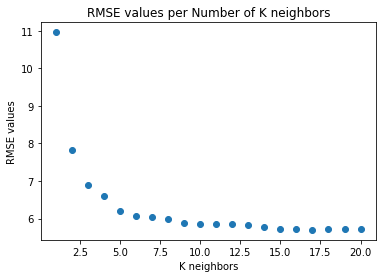

[10.964593301435407, 7.832057416267943, 6.8990962254120145, 6.589055023923445, 6.1885167464114845, 6.075544922913345, 6.047944536666341, 5.994617224880383, 5.870057298127474, 5.840124401913876, 5.8631104432757315, 5.860041201488569, 5.822332323546898, 5.776721023337565, 5.721730994152046, 5.716234300239234, 5.695736825549246, 5.712106444562584, 5.721737862662196, 5.718435406698564]


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['Shell weight', 'Diameter', 'Viscera weight']
hyper_params = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mse_values1 = list()


for item in hyper_params:
    np.random.seed(1)
    abalone_new = abalone.copy()    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(abalone_new.index)
    rand_abalone = abalone_new.reindex(shuffled_index)
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_abalone = rand_abalone.iloc[0:3132]
    test_abalone = rand_abalone.iloc[3132:]
    knn = KNeighborsRegressor(n_neighbors=item , algorithm='brute')
    knn.fit(train_abalone[features], train_abalone['Rings'])
    predictions = knn.predict(test_abalone[features])
    mse = mean_squared_error(test_abalone['Rings'], predictions)
    mse_values1.append(mse)

plt.scatter(hyper_params, mse_values1)
plt.title('RMSE values per Number of K neighbors')
plt.xlabel('K neighbors')
plt.ylabel('RMSE values')
plt.show()

print(mse_values1)

### As we can see from the graph, the best number of k neighbors which minimizes the root mean squared error values for predicting age is 17. For values higher than 15, the RMSE stays stable at low values. Next, I will test all of the features with different levels of k values to determine if the RMSE can get below the value of 5.69

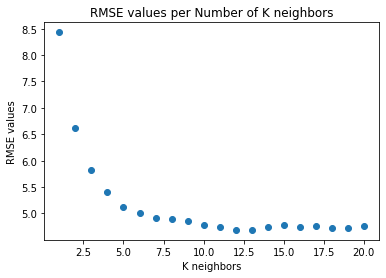

[8.432535885167464, 6.610047846889952, 5.814460393407762, 5.407655502392345, 5.127502392344497, 5.005635300372142, 4.911883605116688, 4.8977721291866025, 4.86187016362455, 4.780143540669856, 4.735829807426153, 4.688549973418394, 4.6913281050932865, 4.736036519871107, 4.772236044657097, 4.748355263157895, 4.75411334249433, 4.7273701931596674, 4.732606131293987, 4.75333971291866]


In [18]:

features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight','Shell weight']
hyper_params = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mse_values2 = list()


for item in hyper_params:
    np.random.seed(1)
    abalone_new = abalone.copy()    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(abalone_new.index)
    rand_abalone = abalone_new.reindex(shuffled_index)
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_abalone = rand_abalone.iloc[0:3132]
    test_abalone = rand_abalone.iloc[3132:]
    knn = KNeighborsRegressor(n_neighbors=item , algorithm='brute')
    knn.fit(train_abalone[features], train_abalone['Rings'])
    predictions = knn.predict(test_abalone[features])
    mse = mean_squared_error(test_abalone['Rings'], predictions)
    mse_values2.append(mse)


plt.scatter(hyper_params, mse_values2)
plt.title('RMSE values per Number of K neighbors')
plt.xlabel('K neighbors')
plt.ylabel('RMSE values')
plt.show()
print(mse_values2)

## Cross Validation

### When cross validating with three features vs. all features, cross validating with 5 folds on the three best features produces an exact prediction of rings about 25% of the time. This is about the same percentage of accuracy that can be expected when using all features and adjusting the number of folds to find the highest percentage of exactly predicted number of rings.

In [60]:
# cross validation using the three best features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
abalone_new = abalone.copy()
abalone_new = abalone_new.loc[np.random.permutation(len(abalone_new))]
knn_cv = KNeighborsClassifier(n_neighbors=17)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, abalone_new[['Shell weight', 'Diameter','Viscera weight']], abalone_new['Rings'], cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:', (np.mean(cv_scores)))

[0.23086124 0.26196172 0.2491018  0.24550898 0.24431138]
cv_scores mean: 0.24634902443915996


/Users/aprilspencer/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [87]:
# cross validation using all the features
abalone_new = abalone.copy()
abalone_new = abalone_new.loc[np.random.permutation(len(abalone_new))]
knn_cv = KNeighborsClassifier(n_neighbors=12)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, abalone_new[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight','Shell weight']], abalone_new['Rings'], cv=11)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:', (np.mean(cv_scores)))

[0.25526316 0.24473684 0.23421053 0.26578947 0.23684211 0.24736842
 0.26842105 0.22894737 0.22163588 0.26121372 0.22691293]
cv_scores mean: 0.24466740730454103


/Users/aprilspencer/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(("The least populated class in y has only %d"


## Conclusion

### When testing ALL of the posssible features at different k values, the best k value is 12, with the minimized RMSE of 4.69.  That is just 1 unit smaller than our best feature selection of three best features, so our model is fairly robust. In conclusion, scientists who cannot count the number of rings on a shell can instead come within an aveage of 2.6 rings of accuracy by measuring the shell weight instead. Beyond that, measuring three features which include shell weight, diameter, and viscera weight and using a KNN machine learning algorithm produces an accuracy within 2.48 rings, a slight improvement. It should be noted that these models only provide the exact accurate prediction of rings 24-25% of the time.